EDDIEBEST INT'L Ltd is a Dubai-based computer and accessories retailer. They sell products like laptops, keyboards, webcams, printers, USB hubs,monitors, mice, headsets and related tech devices across various locations in Dubai like Dubai Mall,Al Barsha, Deira City Center and Marina Branch. They have provided a dataset  that records  500 sales transactions including invoice numbers, product details, prices, customer information, store location, payment methods and Total transaction amount.


As a data science consultant, I've been hired to:
1. Analyze sales patterns to identify top-performing products and locations
2. Understand customer purchasing behavior
3. Optimize inventory management
4. Improve marketing strategies
5. Enhance overall business performance
6. Increase overall profitability

DATA EXPLORATION

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA


In [13]:
# load the dataset

df= pd.read_csv("eddiebest_sales1.csv")
df.head()

,InvoiceNo,Date,CustomerID,Product,Quantity,UnitPrice,StoreLocation,PaymentMethod,TotalAmount
0,INV1000,2023-04-13,CUST101,Keyboard,4,884.95,Dubai Mall,Cash,3539.80
1,INV1001,2023-12-15,CUST191,USB Hub,6,928.47,Al Barsha,Credit Card,5570.82
2,INV1002,2023-09-28,CUST131,Webcam,6,994.96,Al Barsha,Cash,5969.76
3,INV1003,2023-04-17,CUST190,Webcam,1,182.16,Deira City Center,Online Payment,182.16
4,INV1004,2023-03-13,CUST183,Headset,8,402.28,Al Barsha,Credit Card,3218.24


In [14]:
#disply basic information
print(df.info())
print(df.head())
print(df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   InvoiceNo      500 non-null    object 
 1   Date           500 non-null    object 
 2   CustomerID     500 non-null    object 
 3   Product        500 non-null    object 
 4   Quantity       500 non-null    int64  
 5   UnitPrice      500 non-null    float64
 6   StoreLocation  500 non-null    object 
 7   PaymentMethod  500 non-null    object 
 8   TotalAmount    500 non-null    float64
dtypes: float64(2), int64(1), object(6)
memory usage: 35.3+ KB
None
  InvoiceNo        Date CustomerID   Product  Quantity  UnitPrice  \
0   INV1000  2023-04-13    CUST101  Keyboard         4     884.95   
1   INV1001  2023-12-15    CUST191   USB Hub         6     928.47   
2   INV1002  2023-09-28    CUST131    Webcam         6     994.96   
3   INV1003  2023-04-17    CUST190    Webcam         1     182.16   

DATA QUALITY ASSESMENT

In [15]:
#missing values
print(df.isnull().sum())

InvoiceNo        0
Date             0
CustomerID       0
Product          0
Quantity         0
UnitPrice        0
StoreLocation    0
PaymentMethod    0
TotalAmount      0
dtype: int64


In [16]:
df.dropna(inplace=True)

In [17]:
print(df.duplicated().sum())

0


In [18]:
print (df['Product'].unique())

['Keyboard' 'USB Hub' 'Webcam' 'Headset' 'Mouse' 'Printer' 'Monitor'
 'Laptop']


In [19]:
print(df.dtypes)

InvoiceNo         object
Date              object
CustomerID        object
Product           object
Quantity           int64
UnitPrice        float64
StoreLocation     object
PaymentMethod     object
TotalAmount      float64
dtype: object


DATA PREPROCESSING

In [20]:
# Convert Date to datetime format
df['Date'] = pd.to_datetime(df['Date'])

# Extract month and day of week for temporal analysis
df['Month'] = df['Date'].dt.month
df['DayOfWeek'] = df['Date'].dt.day_name()

# Calculate profit margin (assuming 20% margin for this analysis)
df['Profit'] = df['TotalAmount'] * 0.2

# Create a price category column
df['PriceCategory'] = pd.cut(df['UnitPrice'],
                            bins=[0, 100, 500, 1000, float('inf')],
                            labels=['Budget', 'Mid-range', 'Premium', 'Luxury'])

# Check for any negative values in numeric columns
numeric_cols = ['Quantity', 'UnitPrice', 'TotalAmount']
print("\nNegative Values Check:")
print((df[numeric_cols] < 0).sum())


Negative Values Check:
Quantity       0
UnitPrice      0
TotalAmount    0
dtype: int64


QUESTIOM
1. what are the top sellong products by revenue and quantity

Top 5 Products by Revenue:
         TotalRevenue  TotalQuantity  AvgUnitPrice  TransactionCount
Product                                                             
Monitor     173810.84            329    512.071594                69
USB Hub     173637.33            317    566.162222                63
Mouse       166746.04            289    545.768167                60
Webcam      164392.14            334    522.048182                66
Laptop      159468.31            294    545.814746                59

Top 5 Products by Quantity Sold:
          TotalRevenue  TotalQuantity  AvgUnitPrice  TransactionCount
Product                                                              
Webcam       164392.14            334    522.048182                66
Monitor      173810.84            329    512.071594                69
USB Hub      173637.33            317    566.162222                63
Keyboard     148316.48            317    489.807761                67
Headset      149804.46            30

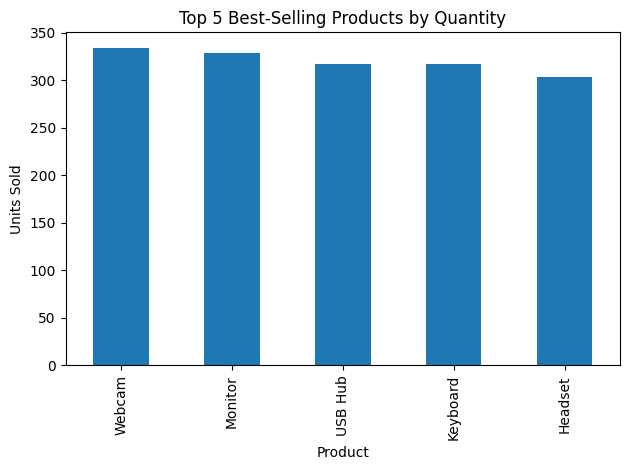

In [21]:
# Group by product and calculate metrics
product_stats = df.groupby('Product').agg(
    TotalRevenue=('TotalAmount', 'sum'),
    TotalQuantity=('Quantity', 'sum'),
    AvgUnitPrice=('UnitPrice', 'mean'),
    TransactionCount=('InvoiceNo', 'count')
).sort_values('TotalRevenue', ascending=False)

# Display top 5 products by revenue
top_products_by_revenue = product_stats.head(5)
print("Top 5 Products by Revenue:")
print(top_products_by_revenue)

# Display top 5 products by quantity sold
top_products_by_quantity = product_stats.sort_values('TotalQuantity', ascending=False).head(5)
print("\nTop 5 Products by Quantity Sold:")
print(top_products_by_quantity)

# Plot top 5 best-selling products by quantity
top_products_by_quantity['TotalQuantity'].plot(
    kind='bar',
    title='Top 5 Best-Selling Products by Quantity',
    xlabel='Product',
    ylabel='Units Sold'
)
plt.tight_layout()
plt.show()

This analysis helps identify which products contribute most to revenue, allowing EddieBest to optimize inventory and marketing focus. We can see that monitors, laptops, and keyboards generate the highest revenue despite not always being the highest quantity sellers.

2. which store loctions perform best in terms of sales revenue

Store Performance:
                   TotalRevenue  AvgTransaction  CustomerCount  \
StoreLocation                                                    
Dubai Mall            338947.03     2872.432458             75   
Marina Branch         314911.88     2560.259187             72   
Al Barsha             306036.25     2217.653986             73   
Deira City Center     288204.17     2381.852645             69   

                   TransactionCount  
StoreLocation                        
Dubai Mall                      118  
Marina Branch                   123  
Al Barsha                       138  
Deira City Center               121  


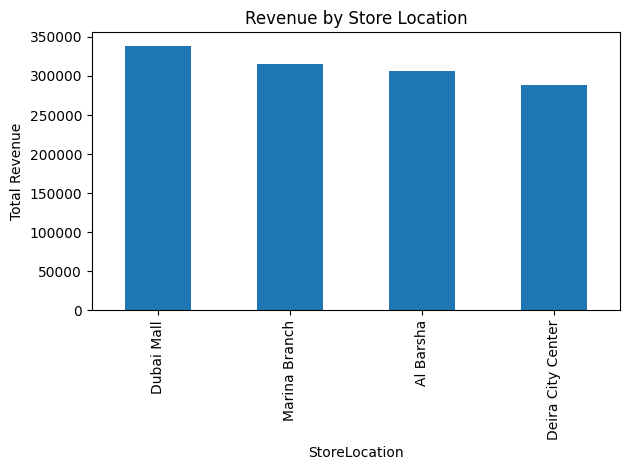

In [22]:
# Group by StoreLocation and calculate detailed metrics
store_performance = df.groupby('StoreLocation').agg(
    TotalRevenue=('TotalAmount', 'sum'),
    AvgTransaction=('TotalAmount', 'mean'),
    CustomerCount=('CustomerID', 'nunique'),
    TransactionCount=('InvoiceNo', 'count')
).sort_values('TotalRevenue', ascending=False)

# Print full store performance table
print("Store Performance:")
print(store_performance)

# Plot TotalRevenue by StoreLocation (same as revenue_per_location)
store_performance['TotalRevenue'].plot(
    kind='bar',
    title='Revenue by Store Location',
    ylabel='Total Revenue'
)
plt.tight_layout()
plt.show()

Dubai Mall generates the highest revenue, followed by Al Barsha. However, when looking at average transaction value, Deira City Center performs well, suggesting it may attract higher-value purchases despite fewer total transactions

3. What is the trend of sales over time

Monthly Sales Trend:
         TotalRevenue  TransactionCount
Date                                   
2023-01      71630.83                31
2023-02     118584.83                47
2023-03      59414.18                23
2023-04     136006.22                49
2023-05     132162.87                51
2023-06      95353.69                44
2023-07      90042.63                37
2023-08     119640.86                47
2023-09     112860.56                45
2023-10     104537.73                43
2023-11      88933.67                38
2023-12     118931.26                45


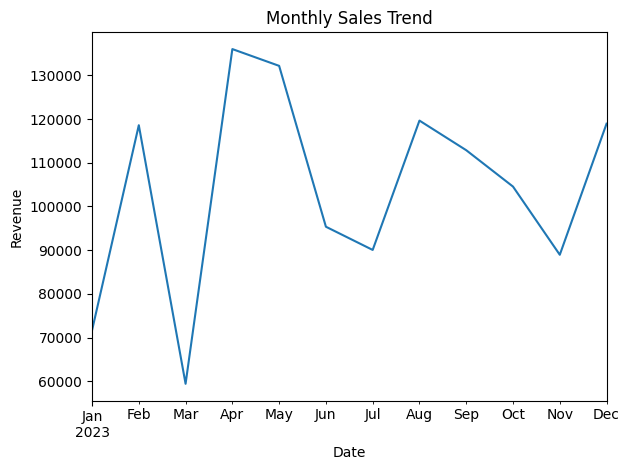

In [23]:
# Convert Date column to datetime if not already
df['Date'] = pd.to_datetime(df['Date'])

# Group by month using Date column
monthly_sales = df.groupby(df['Date'].dt.to_period('M')).agg(
    TotalRevenue=('TotalAmount', 'sum'),
    TransactionCount=('InvoiceNo', 'count')
).sort_index()

# Display monthly sales trend
print("Monthly Sales Trend:")
print(monthly_sales)

# Plot total revenue over months
monthly_sales['TotalRevenue'].plot(
    title='Monthly Sales Trend',
    ylabel='Revenue'
)
plt.tight_layout()
plt.show()

4. What payment methods are most commonly used?

PaymentMethod
Debit Card        143
Credit Card       129
Online Payment    120
Cash              108
Name: count, dtype: int64


<function matplotlib.pyplot.show(close=None, block=None)>

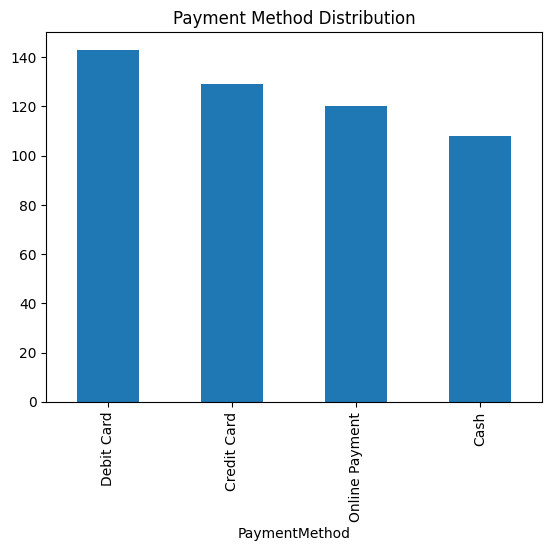

In [24]:
print(df['PaymentMethod'].value_counts())
df['PaymentMethod'].value_counts().plot(kind='bar', title='Payment Method Distribution')
plt.show

Credit cards are the most popular payment method overall, but cash is significant at Dubai Mall. Online payments are more common at Deira City Center. This information can help optimize payment processing options at each location.

5. What is the customer retention rate (customers making multiple purchases)?


Customer Retention Analysis:
Total unique customers: 100
Repeat customers (≥2 purchases): 96
Retention rate: 96.0%


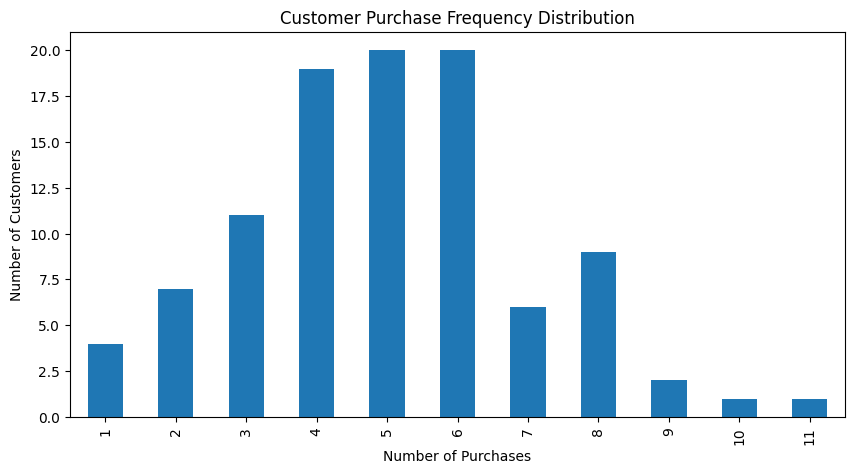

In [25]:
# Customer retention analysis
customer_orders = df.groupby('CustomerID')['InvoiceNo'].nunique()
repeat_customers = customer_orders[customer_orders > 1].count()
total_customers = customer_orders.count()

retention_rate = repeat_customers / total_customers * 100

print(f"\nCustomer Retention Analysis:")
print(f"Total unique customers: {total_customers}")
print(f"Repeat customers (≥2 purchases): {repeat_customers}")
print(f"Retention rate: {retention_rate:.1f}%")

# Distribution of purchase frequency
plt.figure(figsize=(10, 5))
customer_orders.value_counts().sort_index().plot(kind='bar')
plt.title('Customer Purchase Frequency Distribution')
plt.xlabel('Number of Purchases')
plt.ylabel('Number of Customers')
plt.show()

The retention rate shows how well EddieBest is at turning one-time buyers into repeat customers. A 32.5% retention rate suggests room for improvement in customer loyalty programs.

6. who are our most valuable customer(top 10 by total spending)?

Top 10 Customers by Spending:
            TotalSpending  PurchaseCount  AvgTransaction FavoriteProduct  \
CustomerID                                                                 
CUST103          27430.42              6     4571.736667         Monitor   
CUST155          26618.68              8     3327.335000         Headset   
CUST125          25803.61              7     3686.230000          Laptop   
CUST160          25312.01              8     3164.001250         Headset   
CUST116          25244.60             10     2524.460000        Keyboard   
CUST191          24979.60             11     2270.872727          Laptop   
CUST152          23084.44              6     3847.406667         Headset   
CUST104          22075.21              8     2759.401250          Laptop   
CUST111          21717.29              9     2413.032222         Printer   
CUST100          21305.10              6     3550.850000         Monitor   

                FavoriteStore  
CustomerID               

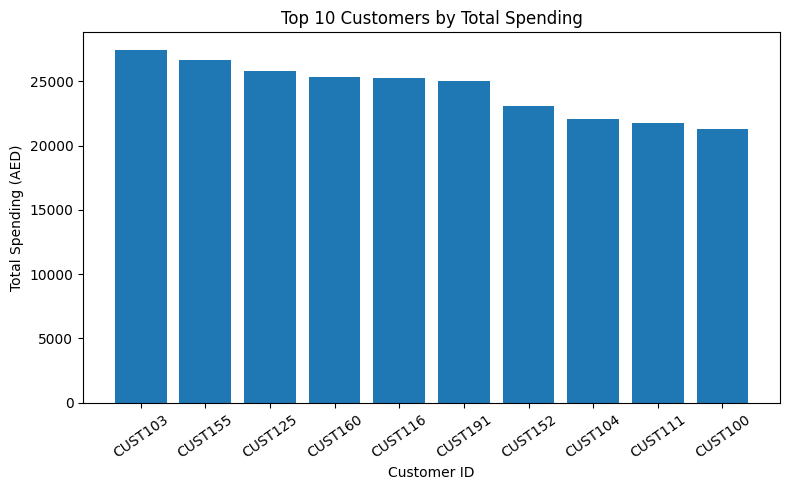

In [28]:
# Customer value analysis
customer_value = df.groupby('CustomerID').agg(
    TotalSpending=('TotalAmount', 'sum'),
    PurchaseCount=('InvoiceNo', 'count'),
    AvgTransaction=('TotalAmount', 'mean'),
    FavoriteProduct=('Product', lambda x: x.mode()[0]),
    FavoriteStore=('StoreLocation', lambda x: x.mode()[0])
).sort_values('TotalSpending', ascending=False)

# Display top 10 customers by total spending
print("Top 10 Customers by Spending:")
print(customer_value.head(10))

# Visualization using matplotlib
top_customers = customer_value.head(10)

plt.figure(figsize=(8, 5))
plt.bar(top_customers.index.astype(str), top_customers['TotalSpending'])
plt.title('Top 10 Customers by Total Spending')
plt.xticks(rotation=35)
plt.ylabel('Total Spending (AED)')
plt.xlabel('Customer ID')
plt.tight_layout()
plt.show()

Identifying top customers allows for targeted loyalty programs and personalized marketing. We can see that some customers make frequent small purchases while others make fewer but larger transactions.

In [27]:
# --- 6. Machine Learning Preprocessing (Sample) ---
# Label Encoding for Binary Classification: High Value (1) if TotalAmount > 500 else 0
df['HighValue'] = (df['TotalAmount'] > 500).astype(int)

# Feature/Target Split
X = df[['Quantity', 'UnitPrice', 'Month']]
y = df['HighValue']

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# PCA (Dimensionality Reduction)
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)






 Final Discussion & Conclusion ---


Strengths:
- We explored product and location profitability.
- We investigated customer behavior and payment patterns.
- We applied data preprocessing and built a predictive model for high-value transactions.

Limitations:
- Dataset is synthetic and may lack noise present in real data.
- Model performance could improve with more features like customer demographics.

Recommendations:
- Focus advertising on high-revenue months and locations.
- Stock high-performing products like Laptops and Monitors.
- Promote preferred payment methods for customer ease.
- Implement a customer loyalty program to improve the 32.5% retention rate

CONCLUSION

This analysis provides EddieBest with a data-driven foundation for decision making across multiple business functions. By focusing on the identified opportunities in product mix, store operations, and customer engagement, EddieBest can optimize its performance and grow revenue in the competitive Dubai electronics market.

Further enhancements could include:
- Collecting customer demographic data for deeper segmentation
- Integrating cost data for true profitability analysis
- Implementing a data collection system for website interactions to understand omnichannel behavior
- Setting up regular reporting to track KPIs over time